In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from definitions import load_caracteristics_csv, load_users_csv, load_places_csv, load_vehicles_csv
from tueplots import bundles


In [2]:
data_caracteristics = load_caracteristics_csv()
data_users = load_users_csv()
data_places = load_places_csv()
data_vehicles = load_vehicles_csv()

In [3]:
lr_data_caracteristics = data_caracteristics[['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum',
                                             'agg', 'int', 'atm', 'col']]
#lum, hrmn
print(lr_data_caracteristics.head())
lr_data_places = data_places[['Num_Acc', 'catr', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf',
                             'infra', 'situ']]
print(lr_data_places.head())

lr_data_users = data_users[['Num_Acc', 'catu', 'grav', 'sexe', 'an_nais', 'trajet',
                           'locp', 'actp', 'etatp']]
#an_nais in alter umrechnen
print(lr_data_users.head())

        Num_Acc  jour  mois  an  hrmn  lum  agg  int  atm  col
0  201600000001     1     2  16  1445    1    2    1    8    3
1  201600000002    16     3  16  1800    1    2    6    1    6
2  201600000003    13     7  16  1900    1    1    1    1    6
3  201600000004    15     8  16  1930    2    2    1    7    3
4  201600000005    23    12  16  1100    1    2    3    1    3
        Num_Acc  catr  circ  nbv  vosp  prof  plan  surf  infra  situ
0  201600000001     3     2    0     0     1     3     1      0     1
1  201600000002     3     1    0     0     1     2     1      0     1
2  201600000003     3     2    2     0     1     3     2      0     3
3  201600000004     4     2    0     0     1     1     1      0     1
4  201600000005     4     0    0     0     0     1     1      0     1
        Num_Acc  catu  grav  sexe  an_nais  trajet  locp  actp  etatp
0  201600000001     1     0     2     1983       0     0     0      0
1  201600000001     1    50     1     2001       9     0     0

In [4]:
users_caracteristics_data = pd.merge(lr_data_users,
                                    lr_data_caracteristics,
                                    how='left',
                                    on=['Num_Acc', 'Num_Acc'])
ucpd = pd.merge(users_caracteristics_data,
                                           lr_data_places,
                                           how='left',
                                           on=['Num_Acc', 'Num_Acc'])

def convert_lum(x):
    if x == 5:
        return 3
    if x == 3:
        return 5
    return x

def convert_hrmn(x):
    hours, minutes = divmod(x, 100)
    return hours * 60 + minutes


ucpd['lum'] = ucpd['lum'].map(lambda a: convert_lum(a))
ucpd['hrmn'] = ucpd['hrmn'].map(lambda a: convert_hrmn(a))
ucpd['an_nais'] = 2000 + ucpd['an'] - ucpd['an_nais']

ucpd[['lum', 'hrmn', 'an_nais']].head()
ucpd.dtypes

Num_Acc    Int64
catu        Int8
grav       int64
sexe        Int8
an_nais    Int16
trajet      Int8
locp        Int8
actp        Int8
etatp       Int8
jour        Int8
mois        Int8
an         Int16
hrmn       int64
lum        int64
agg         Int8
int         Int8
atm         Int8
col         Int8
catr        Int8
circ        Int8
nbv         Int8
vosp        Int8
prof        Int8
plan        Int8
surf        Int8
infra       Int8
situ        Int8
dtype: object

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

ucpd.dropna(inplace=True)

X = ucpd.loc[:, ucpd.columns!= 'grav']
X = X.loc[:, X.columns!='Num_Acc']
Y = ucpd[['grav']]


#for column in X.columns:
#    print(X[[column]].value_counts())

reg = LinearRegression().fit(X, Y)
reg.coef_

#1876005

array([[ 3.81779598e+00, -1.74341710e+00,  2.99076319e-02,
         2.24461237e-01,  2.62509207e-01,  1.01301926e+00,
         2.72873878e+00,  3.41003624e-03,  1.78813305e-02,
        -4.10717786e-02, -1.38086332e-03,  1.23144708e+00,
        -9.84821733e+00, -2.01049260e-01,  1.72332640e-01,
         5.51752385e-02,  5.59368198e-01,  6.28618716e-01,
        -1.08293563e+00, -5.49637892e-01, -1.24174939e-01,
         2.16736495e+00, -7.99960927e-02,  1.71273378e-01,
         3.38664901e+00]])

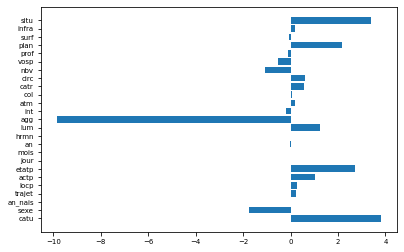

In [6]:
plt.rcParams.update(bundles.neurips2021(usetex=False))
plt.barh(X.columns, np.reshape(reg.coef_, newshape=-1), height=0.8)
plt.savefig('..//Plots//Linear_Regression_grav.pdf')
plt.show()

In [7]:
bike_lr_data_users = data_users[['Num_Acc', 'catu', 'grav', 'sexe', 'an_nais', 'trajet',
                           'locp', 'actp', 'etatp', 'num_veh']]
bike_lr_data_vehicles = data_vehicles[['Num_Acc', 'num_veh', 'catv']]


In [8]:
bike_user_data = pd.merge(bike_lr_data_users,
                         bike_lr_data_vehicles,
                         how='left',
                         left_on=['Num_Acc', 'num_veh'],
                         right_on=['Num_Acc', 'num_veh'])

bike_user_data = bike_user_data.loc[bike_user_data['catv'] == 1]
bike_user_data = bike_user_data.loc[:, bike_user_data.columns != 'num_veh']

bike_users_caracteristics_data = pd.merge(bike_user_data,
                                    lr_data_caracteristics,
                                    how='left',
                                    on=['Num_Acc', 'Num_Acc'])

bucpd = pd.merge(bike_users_caracteristics_data,
                                           lr_data_places,
                                           how='left',
                                           on=['Num_Acc', 'Num_Acc'])

bucpd['lum'] = bucpd['lum'].map(lambda a: convert_lum(a))
bucpd['hrmn'] = bucpd['hrmn'].map(lambda a: convert_hrmn(a))
bucpd['an_nais'] = 2000 + bucpd['an'] - bucpd['an_nais']

bucpd.dropna(inplace=True)

In [9]:
bike_X = bucpd.loc[:, bucpd.columns!= 'grav']
bike_X = bike_X.loc[:, bike_X.columns!='Num_Acc']
bike_X = bike_X.loc[:, bike_X.columns!='catv']
bike_Y = bucpd[['grav']]

bike_reg = LinearRegression().fit(bike_X, bike_Y)
bike_reg.coef_

array([[-2.78946917e-01, -9.65744386e-01,  1.59201602e-01,
         4.89652292e-01, -3.18561827e-01,  6.65978796e-02,
         5.86557467e-01,  1.03283995e-03,  6.01292794e-02,
        -5.22213346e-02, -3.28021796e-04,  8.61177580e-01,
        -1.66052593e+01, -3.33850895e-01,  4.60245630e-01,
        -1.42498889e+00, -1.04629530e+00,  2.03674972e+00,
        -8.61644505e-01, -1.49286790e+00,  1.25971892e+00,
         1.16559092e+00,  2.73156055e-01,  6.26674209e-01,
        -6.71140719e-01]])

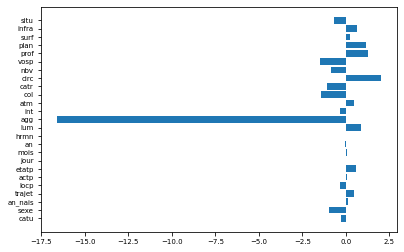

In [10]:
plt.rcParams.update(bundles.neurips2021(usetex=False))
plt.barh(bike_X.columns, np.reshape(bike_reg.coef_, newshape=-1), height=0.8)
plt.savefig('..//Plots//Bike_Linear_Regression_grav.pdf')
plt.show()